In [1]:
%load_ext autoreload
%autoreload 2

import remeta

In [2]:
ds = remeta.load_dataset('type1_only')

----------------------------------
..Generative parameters:
    Type 1 noise distribution: normal
    type1_noise: 0.7
    type1_bias: 0.2
..Descriptive statistics:
    No. subjects: 1
    No. samples: 2000
    Accuracy: 78.3% correct
    d': 1.6
    Choice bias: 7.7%
----------------------------------


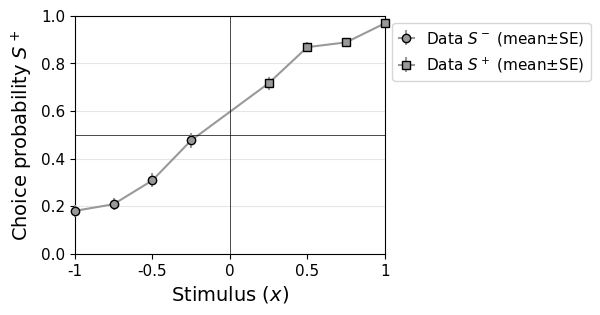

In [3]:
remeta.plot_psychometric(ds)

In [4]:
cfg = remeta.Configuration()
cfg.param_type1_thresh.enable = 1
cfg.param_type1_bias.enable = 2
cfg.skip_type2 = True
params = dict(
    type1_noise=0.5,
    type1_bias=[-0.1, 0.1],
    type1_thresh=0.2
)
cfg.true_params = params
ds2 = remeta.simulate(nsubjects=1, nsamples=1000, params=params, squeeze=True, stim_levels=4, cfg=cfg)

----------------------------------
..Generative parameters:
    Type 1 noise distribution: normal
    type1_noise: 0.5
    type1_bias: [-0.1  0.1]
    type1_thresh: 0.2
..Descriptive statistics:
    No. subjects: 1
    No. samples: 1000
    Accuracy: 90.7% correct
    d': 2.6
    Choice bias: -0.5%
----------------------------------


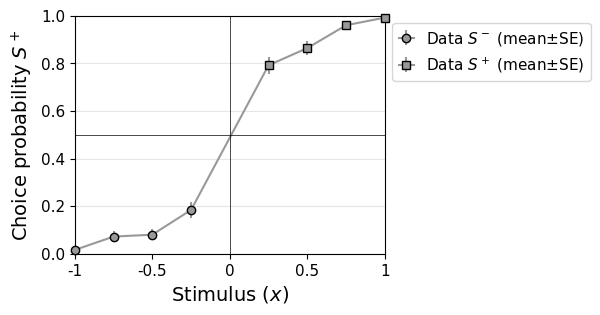

In [5]:
remeta.plot_psychometric(ds2)

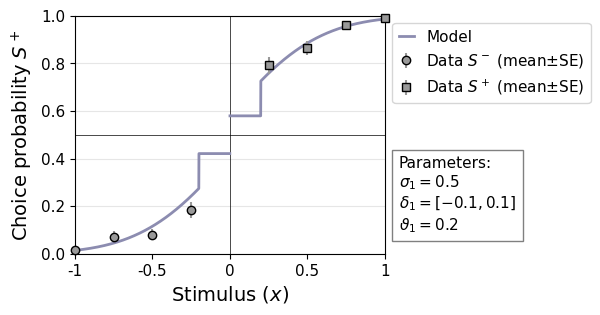

In [13]:
remeta.plot_psychometric(ds2, model_prediction=True)

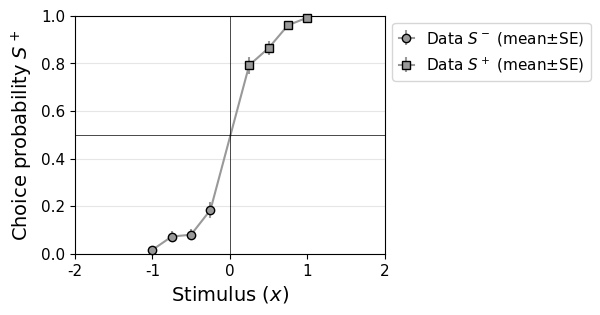

In [6]:
remeta.plot_psychometric(ds2, stim_max=2)

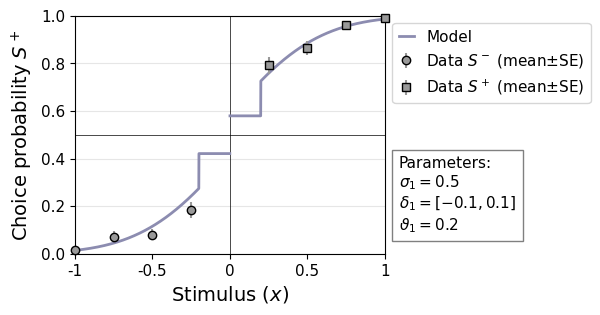

In [7]:
remeta.plot_psychometric(ds2.stimuli, ds2.choices, params=ds2.params)

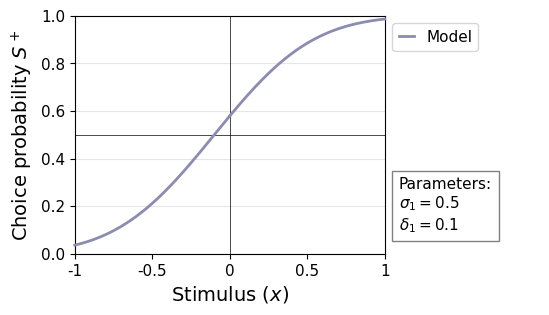

In [8]:
remeta.plot_psychometric(type1_noise=0.5, type1_bias=0.1)

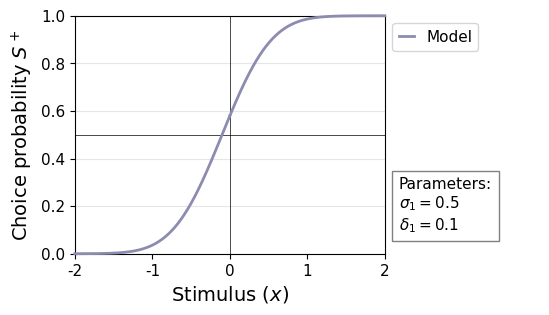

In [9]:
remeta.plot_psychometric(type1_noise=0.5, type1_bias=0.1, stim_max=2)

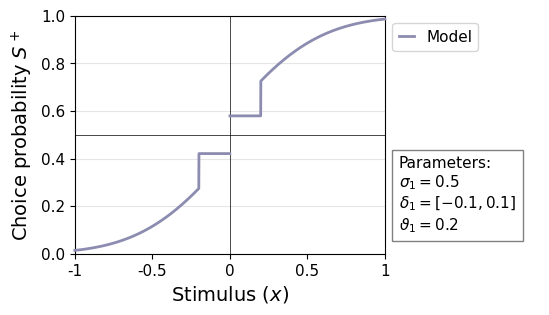

In [10]:
remeta.plot_psychometric(params=params)

In [11]:
cfg.initilialize_fitting_at_true_params = True
rem = remeta.ReMeta(cfg)
rem.fit_type1(ds2.stimuli, ds2.choices)
result = rem.summary()

Dataset characteristics:
    No. subjects: 1
    No. samples: 1000
    Accuracy: 90.7% correct
    d': 2.646
    Choice bias: -0.5%

+++ Type 1 level +++
  Subject-level estimation (MLE)
    .. finished (0.3 secs).
  Final report
    Parameters estimates (subject-level fit)
        [subject] type1_noise: 0.595 ± 0.084 (true: 0.500)
        [subject] type1_thresh: 0.211 ± 0.051 (true: 0.200)
        [subject] type1_bias: [-0.262 ± 0.118, 0.232 ± 0.113] (true: [-0.100, 0.100])
    [subject] Log-likelihood: -279.94 (per sample: -0.2799)
    [subject] Fitting time: 0.21 secs
    Log-likelihood using true params: -301.20 (per sample: -0.3012)
Type 1 level finished


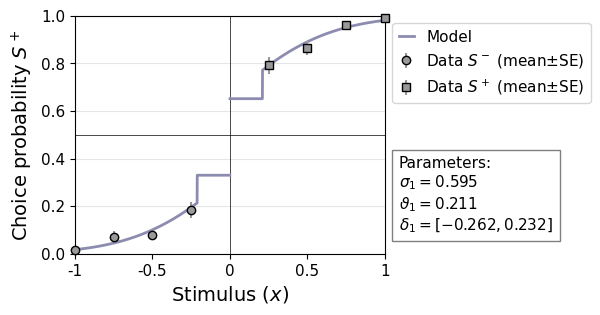

In [12]:
rem.plot_psychometric()